In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np


warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('liquor_store_sales.csv')
data

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.00,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.00,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.00,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.00,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.00,4.0,0.0
...,...,...,...,...,...,...,...,...,...
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46,59.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08,7.0,35.0
128352,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.00,0.0,32.0
128353,2018,2,NaN,BC,BEER CREDIT,REF,0.00,0.0,-35.0


1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

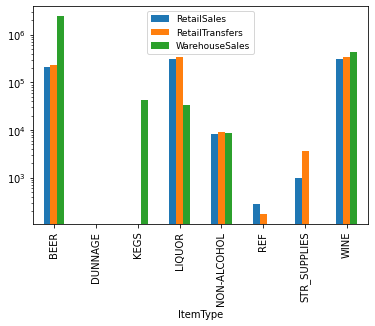

In [4]:
total_values = data[["RetailSales", "RetailTransfers", "WarehouseSales", "ItemType"]].groupby("ItemType").agg("sum")
total_values.plot.bar(log=1)
plt.legend(prop={'size': 9})
plt.show()

2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales.
 

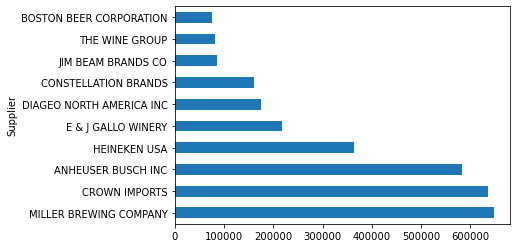

In [5]:
suppliers = data.groupby('Supplier').sum()[["RetailSales", "RetailTransfers", "WarehouseSales"]].sort_values('Supplier', ascending=False)
suppliers = suppliers.sum(axis=1).sort_values(ascending=False)[:10]
suppliers.plot.barh()
plt.show()

3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

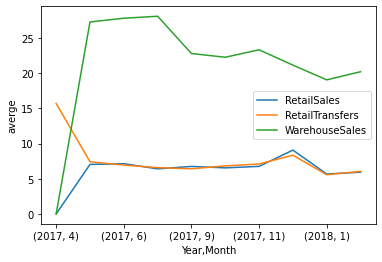

In [6]:
avg_sales = data.groupby(['Year','Month']).mean()[["RetailSales", "RetailTransfers", "WarehouseSales"]]

avg_sales.plot(ylabel='averge')
plt.show()

4. Plot the same information as above but as a bar chart.


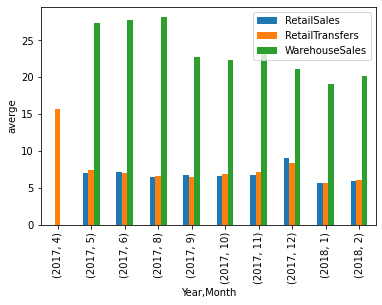

In [7]:
avg_sales = data.groupby(['Year','Month']).mean()[["RetailSales", "RetailTransfers", "WarehouseSales"]]

avg_sales.plot.bar(ylabel='averge')
plt.show()

Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).
Hint: There should be a line representing each Item Type.

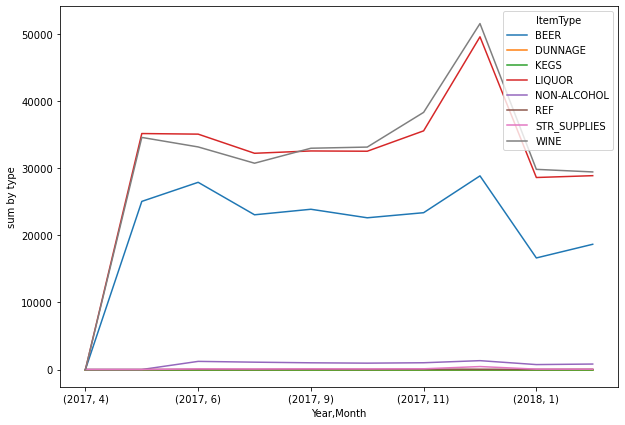

In [8]:
linebytype=data.pivot_table(index=('Year','Month'),columns='ItemType',values=('RetailSales'),fill_value=0,aggfunc=np.sum)
linebytype.plot(ylabel='sum by type', figsize=(10, 7))
plt.show()

In [9]:
linebytype

ItemType        BEER  DUNNAGE  KEGS    LIQUOR  NON-ALCOHOL    REF  \
Year Month                                                          
2017 4          0.00        0     0      0.00         0.00   0.00   
     5      25023.24        0     0  35123.36         0.00   0.00   
     6      27863.26        0     0  35035.31      1209.23  30.60   
     8      23030.13        0     0  32186.04      1091.28  19.54   
     9      23852.76        0     0  32532.32       997.11  38.88   
     10     22583.78        0     0  32491.59       945.63  22.82   
     11     23341.14        0     0  35524.77      1005.19  63.11   
     12     28822.16        0     0  49522.28      1316.44  41.21   
2018 1      16606.33        0     0  28579.87       732.25  23.66   
     2      18640.31        0     0  28852.31       812.84  41.52   

ItemType    STR_SUPPLIES      WINE  
Year Month                          
2017 4              0.00      0.00  
     5              0.00  34546.89  
     6             89.22  33129.64  
     8             77.34  30707.45  
     9             94.64  32936.89  
     10            84.38  33108.76  
     11           106.06  38275.92  
     12           439.64  51492.76  
2018 1             56.94  29792.72  
     2             47.76  29409.39

6. Plot the same information as above but as a bar chart.

<function matplotlib.pyplot.show(close=None, block=None)>

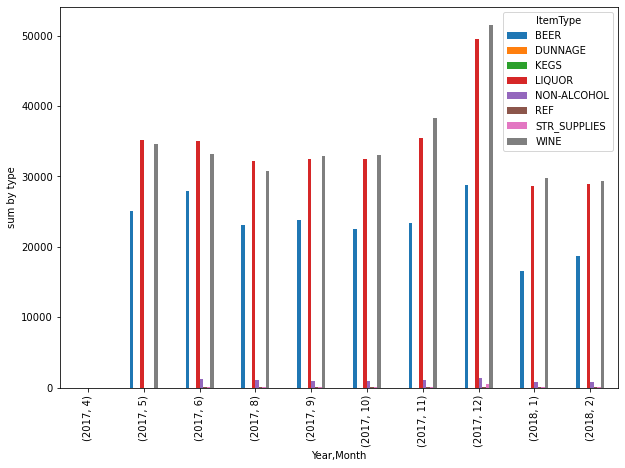

In [10]:
linebytype.plot.bar(ylabel='sum by type', figsize=(10, 7))
plt.show

7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.


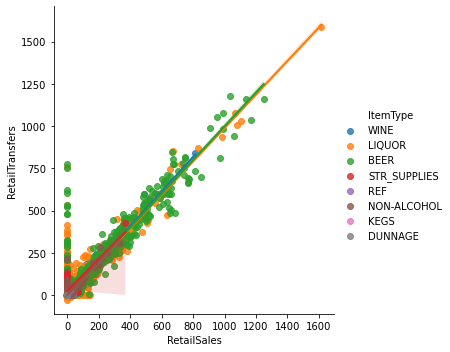

In [11]:
sns.lmplot(x="RetailSales", y="RetailTransfers", hue="ItemType", data=data)


8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.
Hint: Seaborn's pairplot may be your best option here.

In [12]:
numeric= data.select_dtypes(include=['float64', 'int64'])


In [13]:
numeric.columns

Index(['Year', 'Month', 'RetailSales', 'RetailTransfers', 'WarehouseSales'], dtype='object')

In [14]:
new_data = data[['Year', 'Month', 'RetailSales', 'RetailTransfers', 'WarehouseSales', 'ItemType']]
new_data

,Year,Month,RetailSales,RetailTransfers,WarehouseSales,ItemType
0,2017,4,0.00,1.0,0.0,WINE
1,2017,4,0.00,1.0,0.0,WINE
2,2017,4,0.00,8.0,0.0,LIQUOR
3,2017,4,0.00,2.0,0.0,LIQUOR
4,2017,4,0.00,4.0,0.0,WINE
...,...,...,...,...,...,...
128350,2018,2,66.46,59.0,212.0,BEER
128351,2018,2,9.08,7.0,35.0,BEER
128352,2018,2,0.00,0.0,32.0,KEGS
128353,2018,2,0.00,0.0,-35.0,REF


In [ ]:
last=sns.pairplot(new_data, hue = 'ItemType')

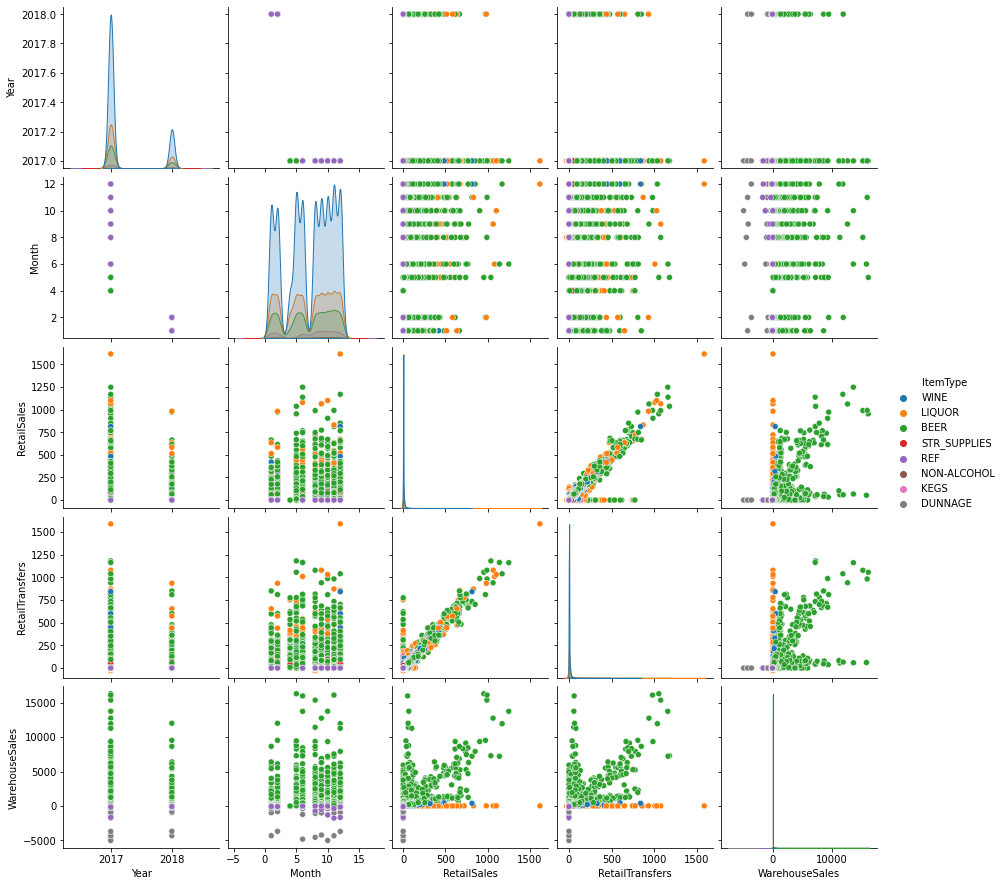

In [16]:
sns.pairplot(new_data, hue='ItemType', size=2.5)
